# Packages

In [2]:
import numpy as np

import matplotlib.pyplot as plt

import pandas as pd

from sklearn.linear_model import LinearRegression

# 1-Dataset

### Exercise 1


In [6]:
url  = "https://raw.githubusercontent.com/devzohaib/Simple-Linear-Regression/master/tvmarketing.csv"
adv = pd.read_csv(url)

In [7]:
adv.head()

,TV,Sales
0,230.1,22.1
1,44.5,10.4
2,17.2,9.3
3,151.5,18.5
4,180.8,12.9


<Axes: xlabel='TV', ylabel='Sales'>

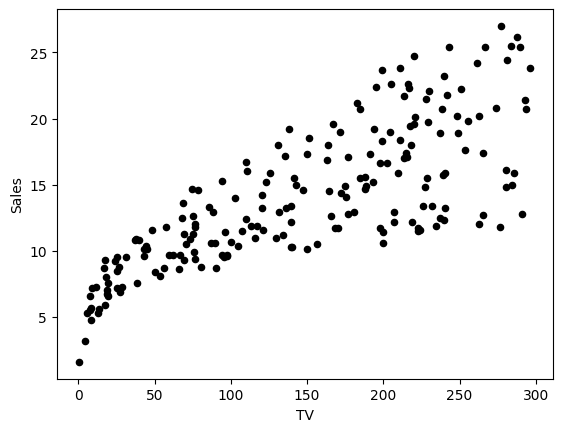

In [8]:
adv.plot(x='TV', y='Sales', kind='scatter', c='black')

# 2 - Linear Regression in Python with NumPy and Scikit-Learn

In [9]:
#Save the required field of the DataFrame into variables X and Y:
X = adv['TV']
Y = adv['Sales']

## 2.1 - Linear Regression with NumPy


You can use the function np.polyfit(x, y, deg) to fit a polynomial of degree deg to points  (𝑥,𝑦) , minimising the sum of squared errors.

 numpy.polyfit(x, y, deg, rcond=None, full=False, w=None, cov=False)


Parameters:
x :-
array_like, shape (M,)
x-coordinates of the M sample points (x[i], y[i]).

y :-
array_like, shape (M,) or (M, K)
y-coordinates of the sample points. Several data sets of sample points sharing the same x-coordinates can be fitted at once by passing in a 
2D-array that contains one dataset per column.

deg :-
int
Degree of the fitting polynomial

rcond :-
float, optional
Relative condition number of the fit. Singular values smaller than this relative to the largest singular value will be ignored. The default
value is len(x)*eps, where eps is the relative precision of the float type, about 2e-16 in most cases.

full :-
bool, optional
Switch determining nature of return value. When it is False (the default) just the coefficients are returned, when True diagnostic 
information from the singular value decomposition is also returned.

w :-
array_like, shape (M,), optional
Weights. If not None, the weight w[i] applies to the unsquared residual y[i] - y_hat[i] at x[i]. Ideally the weights are chosen so that the 
errors of the products w[i]*y[i] all have the same variance. When using inverse-variance weighting, use w[i] = 1/sigma(y[i]). The default 
value is None.

cov :-
bool or str, optional
If given and not False, return not just the estimate but also its covariance matrix. By default, the covariance are scaled by chi2/dof,
where dof = M - (deg + 1), i.e., the weights are presumed to be unreliable except in a relative sense and everything is scaled such that the 
reduced chi2 is unity. This scaling is omitted if cov='unscaled', as is relevant for the case that the weights are w = 1/sigma, with sigma 
known to be a reliable estimate of the uncertainty


In [16]:
m_numpy, b_numpy = np.polyfit(X, Y, 1)

print(f"Linear regression with NumPy. Slope: {m_numpy}. Intercept: {b_numpy}")

Linear regression with NumPy. Slope: 0.04753664043301971. Intercept: 7.032593549127703


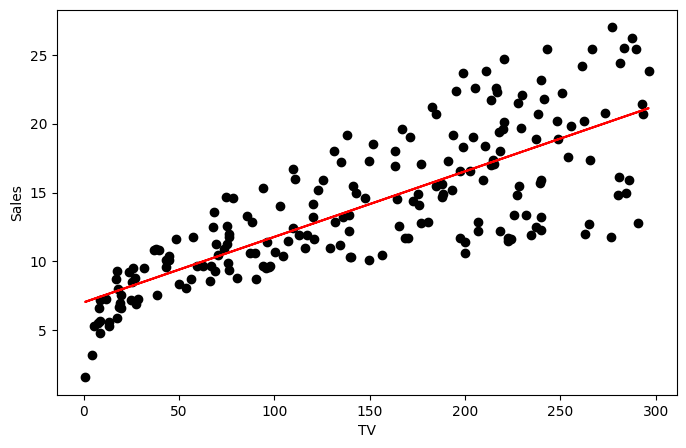

In [17]:
#The regression line is red.
def plot_linear_regression(X, Y, x_label, y_label, m, b, X_pred=np.array([]), Y_pred=np.array([])):
    fig, ax = plt.subplots(1,1,figsize=(8,5))
    ax.plot(X, Y, 'o', color='black')
    ax.set_xlabel(x_label)
    ax.set_ylabel(y_label)

    ax.plot(X, m*X + b, color='red')
    ax.plot(X_pred, Y_pred, 'o', color='blue', markersize=8)
    
plot_linear_regression(X, Y, 'TV', 'Sales', m_numpy, b_numpy)

### Exercise 2
Make predictions substituting the obtained slope and intercept coefficients into the equation  𝑌=𝑚𝑋+𝑏
 , given an array of  𝑋
  values.

In [18]:
def pred_numpy(m, b, X):
    
    Y = 𝑚*X+𝑏

    return Y

In [19]:
X_pred = np.array([50, 120, 280])
Y_pred_numpy = pred_numpy(m_numpy, b_numpy, X_pred)

print(f"TV marketing expenses:\n{X_pred}")
print(f"Predictions of sales using NumPy linear regression:\n{Y_pred_numpy}")

TV marketing expenses:
[ 50 120 280]
Predictions of sales using NumPy linear regression:
[ 9.40942557 12.7369904  20.34285287]


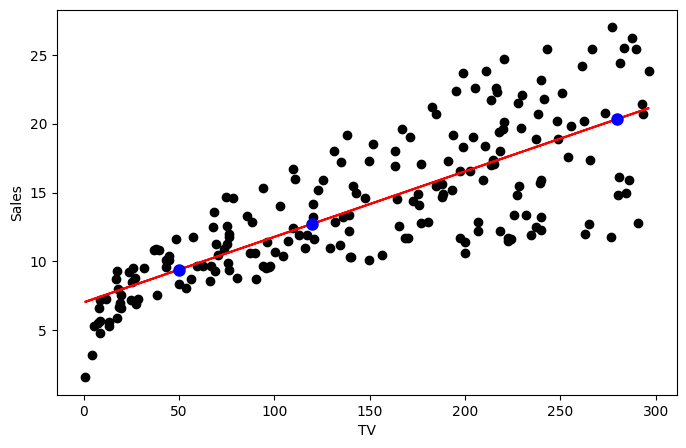

In [20]:
#Prediction points to the plot (blue dots).
plot_linear_regression(X, Y, 'TV', 'Sales', m_numpy, b_numpy, X_pred, Y_pred_numpy)

## 2.2 - Linear Regression with Scikit-Learn

Scikit-Learn is an open-source machine learning library that supports supervised and unsupervised learning. It also provides various tools for model fitting, data preprocessing, model selection, model evaluation, and many other utilities. Scikit-learn provides dozens of built-in machine learning algorithms and models, called estimators. Each estimator can be fitted to some data using its fit method. 

In [21]:
lr_sklearn = LinearRegression()

In [28]:
print(f"Shape of X array: {X.shape}")
print(f"Shape of Y array: {Y.shape}")

try:
    lr_sklearn.fit(X, Y)
    print("Model fitted successfully")
except ValueError as err:
    print("Error:", err)

Shape of X array: (200,)
Shape of Y array: (200,)
Error: Expected a 2-dimensional container but got <class 'pandas.core.series.Series'> instead. Pass a DataFrame containing a single row (i.e. single sample) or a single column (i.e. single feature) instead.


In [33]:
# Convert to NumPy arrays and reshape
X_sklearn = np.array(X).reshape(-1, 1)
Y_sklearn = np.array(Y).reshape(-1, 1)

print(f"Shape of new X array: {X_sklearn.shape}")
print(f"Shape of new Y array: {Y_sklearn.shape}")

Shape of new X array: (200, 1)
Shape of new Y array: (200, 1)


### Breakdown of Reshaping:
1-np.array(X)

np.array([1, 2, 3, 4])  # Shape: (4,)

If X is a list like [1, 2, 3, 4], converting it to a NumPy array results in:-1D array of shape (4,).

#2-.reshape(-1, 1)

np.array([[1], 
          [2], 
          [3], 
          [4]])  # Shape: (4, 1)

The -1 automatically determines the number of rows based on the length of X, and 1 forces it to have one column.:-Now, it's a 2D array with 4 rows and 1 column.

##### Note:-
If X has N elements, then .reshape(-1, 1) transforms it into a shape of (N, 1), meaning it becomes a column vector.

### Exercise 3
Fit the linear regression model passing X_sklearn and Y_sklearn arrays into the function lr_sklearn.fit.

In [34]:
lr_sklearn.fit(X_sklearn, Y_sklearn)

LinearRegression()

In [35]:
m_sklearn = lr_sklearn.coef_
b_sklearn = lr_sklearn.intercept_

print(f"Linear regression using Scikit-Learn. Slope: {m_sklearn}. Intercept: {b_sklearn}")

Linear regression using Scikit-Learn. Slope: [[0.04753664]]. Intercept: [7.03259355]


### Exercise 4
Increase the dimension of the  𝑋
  array using the function np.newaxis and pass the result to the lr_sklearn.predict function to make predictions.

In [37]:
def pred_sklearn(X, lr_sklearn):
    
    X_2D = X[:, np.newaxis]
    Y = lr_sklearn.predict(X_2D)
    
    
    return Y

In [38]:
Y_pred_sklearn = pred_sklearn(X_pred, lr_sklearn)

print(f"TV marketing expenses:\n{X_pred}")
print(f"Predictions of sales using Scikit_Learn linear regression:\n{Y_pred_sklearn.T}")

TV marketing expenses:
[ 50 120 280]
Predictions of sales using Scikit_Learn linear regression:
[[ 9.40942557 12.7369904  20.34285287]]


# 3-Linear Regression using Gradient Descent


Let's try to find linear regression coefficients  𝑚
  and  𝑏
 , by minimising the difference between original values  𝑦(𝑖)
  and predicted values  𝑦̂ (𝑖)
  with the loss function  𝐿(𝑤,𝑏)=1/2(𝑦̂ (𝑖)−𝑦(𝑖))**2
  for each of the training examples. Division by  2
  is taken just for scaling purposes, you will see the reason below, calculating partial derivatives.

To compare the resulting vector of the predictions  𝑌̂ 
  with the vector  𝑌
  of original values  𝑦(𝑖)
 , you can take an average of the loss function values for each of the training examples:

𝐸(𝑚,𝑏) = 1/2𝑛∑𝑖=1𝑛(𝑦̂ (𝑖)−𝑦(𝑖))**2
=1/2𝑛 ∑𝑖=1𝑛 (𝑚𝑥(𝑖)+𝑏−𝑦(𝑖))**2,

where  𝑛
  is a number of data points. This function is called the sum of squares cost function. To use gradient descent algorithm, calculate partial derivatives as:

∂𝐸/∂𝑚 = 1/𝑛∑𝑖=1𝑛(𝑚𝑥(𝑖)+𝑏−𝑦(𝑖))𝑥(𝑖),


∂𝐸/∂𝑏 = 1/𝑛∑𝑖=1𝑛(𝑚𝑥(𝑖)+𝑏−𝑦(𝑖))



and update the parameters iteratively using the expressions

𝑚 = 𝑚−𝛼∂𝐸/∂𝑚,

𝑏 = 𝑏−𝛼∂𝐸/∂𝑏,



where  𝛼 is the learning rate.

In [39]:
X_norm = (X - np.mean(X))/np.std(X)
Y_norm = (Y - np.mean(Y))/np.std(Y)

In [40]:
def E(m, b, X, Y):
    return 1/(2*len(Y))*np.sum((m*X + b - Y)**2)

### Exercise 5
Define functions dEdm and dEdb to calculate partial derivatives according to the equations .This can be done using vector form of the input data X and Y.

In [43]:
def dEdm(m, b, X, Y):
    
    res = 1/len(X)*np.dot(m*X + b - Y, X)
    
    
    return res
    

def dEdb(m, b, X, Y):
    
    
    res = (1 / len(X)) * np.sum(m * X + b - Y)
    
    
    return res

In [44]:
print(dEdm(0, 0, X_norm, Y_norm))
print(dEdb(0, 0, X_norm, Y_norm))
print(dEdm(1, 5, X_norm, Y_norm))
print(dEdb(1, 5, X_norm, Y_norm))

-0.7822244248616066
1.687538997430238e-16
0.21777557513839427
5.000000000000001


### Exercise 6
Implement gradient descent using expressions  (3):

𝑚=𝑚−𝛼∂𝐸/∂𝑚,

𝑏=𝑏−𝛼∂𝐸/∂𝑏,

In [45]:
def gradient_descent(dEdm, dEdb, m, b, X, Y, learning_rate = 0.001, num_iterations = 1000, print_cost=False):
    for iteration in range(num_iterations):
        
        m_new = m - learning_rate * dEdm(m, b, X, Y)
        b_new = b - learning_rate * dEdb(m, b, X, Y)
        
        m = m_new
        b = b_new
        if print_cost:
            print (f"Cost after iteration {iteration}: {E(m, b, X, Y)}")
        
    return m, b

In [46]:
print(gradient_descent(dEdm, dEdb, 0, 0, X_norm, Y_norm))
print(gradient_descent(dEdm, dEdb, 1, 5, X_norm, Y_norm, learning_rate = 0.01, num_iterations = 10))

(0.4946040826958948, -1.3662404541037136e-16)
(0.9791767513915026, 4.521910375044022)


### 
Now run the gradient descent method starting from the initial point  (𝑚0,𝑏0)=(0,0).

In [47]:
m_initial = 0; b_initial = 0; num_iterations = 30; learning_rate = 1.2
m_gd, b_gd = gradient_descent(dEdm, dEdb, m_initial, b_initial, 
                              X_norm, Y_norm, learning_rate, num_iterations, print_cost=True)

print(f"Gradient descent result: m_min, b_min = {m_gd}, {b_gd}") 

Cost after iteration 0: 0.2062999755919659
Cost after iteration 1: 0.19455197461564455
Cost after iteration 2: 0.19408205457659172
Cost after iteration 3: 0.1940632577750296
Cost after iteration 4: 0.1940625059029671
Cost after iteration 5: 0.1940624758280846
Cost after iteration 6: 0.1940624746250893
Cost after iteration 7: 0.19406247457696948
Cost after iteration 8: 0.19406247457504472
Cost after iteration 9: 0.19406247457496772
Cost after iteration 10: 0.19406247457496462
Cost after iteration 11: 0.19406247457496448
Cost after iteration 12: 0.19406247457496453
Cost after iteration 13: 0.19406247457496448
Cost after iteration 14: 0.19406247457496448
Cost after iteration 15: 0.19406247457496448
Cost after iteration 16: 0.19406247457496448
Cost after iteration 17: 0.19406247457496448
Cost after iteration 18: 0.19406247457496448
Cost after iteration 19: 0.19406247457496448
Cost after iteration 20: 0.19406247457496448
Cost after iteration 21: 0.19406247457496448
Cost after iteration 22: 

#
Remember, that the initial datasets were normalized. To make the predictions, you need to normalize X_pred array, calculate Y_pred with the linear regression coefficients m_gd, b_gd and then denormalize the result (perform the reverse process of normalization):

In [49]:
X_pred = np.array([50, 120, 280])

X_pred_norm = (X_pred - np.mean(X))/np.std(X)
Y_pred_gd_norm = m_gd * X_pred_norm + b_gd

Y_pred_gd = Y_pred_gd_norm * np.std(Y) + np.mean(Y)

print(f"TV marketing expenses:\n{X_pred}")
print(f"Predictions of sales using Scikit_Learn linear regression:\n{Y_pred_sklearn.T}")
print(f"Predictions of sales using Gradient Descent:\n{Y_pred_gd}")

TV marketing expenses:
[ 50 120 280]
Predictions of sales using Scikit_Learn linear regression:
[[ 9.40942557 12.7369904  20.34285287]]
Predictions of sales using Gradient Descent:
[ 9.40942557 12.7369904  20.34285287]
